In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.database import DatabaseConnection

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load data from database
db = DatabaseConnection()
df = pd.read_sql("SELECT * FROM hospital_readmissions", db.engine)

print("="*80)
print("HOSPITAL READMISSION DATA - QUALITY ANALYSIS")
print("="*80)



HOSPITAL READMISSION DATA - QUALITY ANALYSIS


In [2]:
# 1. BASIC INFORMATION
print("\n1. DATASET OVERVIEW")
print(f"Shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


1. DATASET OVERVIEW
Shape: (25000, 17)
Memory usage: 14.32 MB


In [3]:
# 2. DATA TYPES
print("\n2. DATA TYPES")
print(df.dtypes)


2. DATA TYPES
age                  object
time_in_hospital      int64
n_lab_procedures      int64
n_procedures          int64
n_medications         int64
n_outpatient          int64
n_inpatient           int64
n_emergency           int64
medical_specialty    object
diag_1               object
diag_2               object
diag_3               object
glucose_test         object
A1Ctest              object
change               object
diabetes_med         object
readmitted           object
dtype: object


In [5]:
# 3. MISSING VALUES ANALYSIS
print("\n3. MISSING VALUES")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Missing_Percentage': missing_pct
})
print(missing_df[missing_df['Missing_Count'] > 0])
if len(missing_df[missing_df['Missing_Count'] > 0]) == 0:
    print("No missing values!")



3. MISSING VALUES
Empty DataFrame
Columns: [Missing_Count, Missing_Percentage]
Index: []
No missing values!


In [6]:
# 4. DUPLICATE RECORDS
print("\n4. DUPLICATE ANALYSIS")
duplicates = df.duplicated().sum()
print(f"Total duplicate rows: {duplicates}")


4. DUPLICATE ANALYSIS
Total duplicate rows: 0


In [7]:
# 5. TARGET VARIABLE ANALYSIS
print("\n5. TARGET VARIABLE (readmitted)")
print(df['readmitted'].value_counts())
print(f"\nReadmission Rate: {(df['readmitted'] == 'yes').sum() / len(df) * 100:.2f}%")


5. TARGET VARIABLE (readmitted)
readmitted
no     13246
yes    11754
Name: count, dtype: int64

Readmission Rate: 47.02%


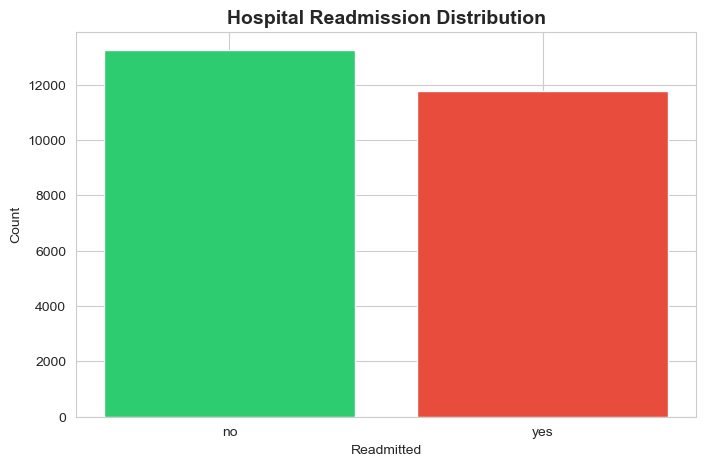

In [8]:
# Visualize readmission distribution
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
readmit_counts = df['readmitted'].value_counts()
ax.bar(readmit_counts.index, readmit_counts.values, color=['#2ecc71', '#e74c3c'])
ax.set_title('Hospital Readmission Distribution', fontsize=14, fontweight='bold')
ax.set_ylabel('Count')
ax.set_xlabel('Readmitted')
plt.show()

In [9]:
# 6. NUMERIC COLUMNS ANALYSIS
print("\n6. NUMERIC COLUMNS STATISTICS")
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(df[numeric_cols].describe())



6. NUMERIC COLUMNS STATISTICS
       time_in_hospital  n_lab_procedures  n_procedures  n_medications  \
count       25000.00000       25000.00000  25000.000000   25000.000000   
mean            4.45332          43.24076      1.352360      16.252400   
std             3.00147          19.81862      1.715179       8.060532   
min             1.00000           1.00000      0.000000       1.000000   
25%             2.00000          31.00000      0.000000      11.000000   
50%             4.00000          44.00000      1.000000      15.000000   
75%             6.00000          57.00000      2.000000      20.000000   
max            14.00000         113.00000      6.000000      79.000000   

       n_outpatient   n_inpatient   n_emergency  
count  25000.000000  25000.000000  25000.000000  
mean       0.366400      0.615960      0.186600  
std        1.195478      1.177951      0.885873  
min        0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000  
50

In [10]:
# Check for outliers in numeric columns
print("\n7. OUTLIER DETECTION (using IQR method)")
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    if len(outliers) > 0:
        print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.2f}%)")


7. OUTLIER DETECTION (using IQR method)
time_in_hospital: 580 outliers (2.32%)
n_lab_procedures: 33 outliers (0.13%)
n_procedures: 1227 outliers (4.91%)
n_medications: 844 outliers (3.38%)
n_outpatient: 4141 outliers (16.56%)
n_inpatient: 1628 outliers (6.51%)
n_emergency: 2728 outliers (10.91%)


In [11]:
# 8. CATEGORICAL COLUMNS ANALYSIS
print("\n8. CATEGORICAL COLUMNS")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Top 5 values:")
    print(df[col].value_counts().head())


8. CATEGORICAL COLUMNS

age:
  Unique values: 6
  Top 5 values:
age
[70-80)    6837
[60-70)    5913
[80-90)    4516
[50-60)    4452
[40-50)    2532
Name: count, dtype: int64

medical_specialty:
  Unique values: 7
  Top 5 values:
medical_specialty
Missing                   12382
InternalMedicine           3565
Other                      2664
Emergency/Trauma           1885
Family/GeneralPractice     1882
Name: count, dtype: int64

diag_1:
  Unique values: 8
  Top 5 values:
diag_1
Circulatory    7824
Other          6498
Respiratory    3680
Digestive      2329
Diabetes       1747
Name: count, dtype: int64

diag_2:
  Unique values: 8
  Top 5 values:
diag_2
Other          9056
Circulatory    8134
Diabetes       2906
Respiratory    2872
Digestive       973
Name: count, dtype: int64

diag_3:
  Unique values: 8
  Top 5 values:
diag_3
Other          9107
Circulatory    7686
Diabetes       4261
Respiratory    1915
Digestive       916
Name: count, dtype: int64

glucose_test:
  Unique values: 3
 

In [12]:
# 9. AGE DISTRIBUTION ANALYSIS
print("\n9. AGE DISTRIBUTION ANALYSIS")
print(df['age'].value_counts().sort_index())


9. AGE DISTRIBUTION ANALYSIS
age
[40-50)     2532
[50-60)     4452
[60-70)     5913
[70-80)     6837
[80-90)     4516
[90-100)     750
Name: count, dtype: int64


In [13]:
# 10. MEDICAL SPECIALTY ANALYSIS
print("\n10. MEDICAL SPECIALTY ANALYSIS")
print(f"Missing specialty: {(df['medical_specialty'] == 'Missing').sum()}")
print(f"Percentage of Missing: {(df['medical_specialty'] == 'Missing').sum() / len(df) * 100:.2f}%")



10. MEDICAL SPECIALTY ANALYSIS
Missing specialty: 12382
Percentage of Missing: 49.53%


In [14]:
# 11. DIAGNOSIS ANALYSIS
print("\n11. DIAGNOSIS ANALYSIS")
print("\nPrimary Diagnosis (diag_1):")
print(df['diag_1'].value_counts())


11. DIAGNOSIS ANALYSIS

Primary Diagnosis (diag_1):
diag_1
Circulatory        7824
Other              6498
Respiratory        3680
Digestive          2329
Diabetes           1747
Injury             1666
Musculoskeletal    1252
Missing               4
Name: count, dtype: int64


In [15]:
# 12. MEDICATION AND TESTS
print("\n12. MEDICATION AND TESTS")
print(f"Glucose test - yes: {(df['glucose_test'] == 'yes').sum()}")
print(f"A1C test - yes: {(df['A1Ctest'] == 'yes').sum()}")
print(f"Medication changed - yes: {(df['change'] == 'yes').sum()}")
print(f"Diabetes medication - yes: {(df['diabetes_med'] == 'yes').sum()}")


12. MEDICATION AND TESTS
Glucose test - yes: 0
A1C test - yes: 0
Medication changed - yes: 11503
Diabetes medication - yes: 19228


In [16]:
# 13. CORRELATION ANALYSIS (numeric only)
print("\n13. NUMERIC FEATURES CORRELATION WITH READMISSION")
# Create binary target for correlation
df['readmitted_binary'] = (df['readmitted'] == 'yes').astype(int)
numeric_with_target = df[numeric_cols].copy()
numeric_with_target['readmitted_binary'] = df['readmitted_binary']
correlation = numeric_with_target.corr()['readmitted_binary'].sort_values(ascending=False)
print(correlation)


13. NUMERIC FEATURES CORRELATION WITH READMISSION
readmitted_binary    1.000000
n_inpatient          0.212480
n_outpatient         0.095487
n_emergency          0.093519
time_in_hospital     0.043141
n_medications        0.036871
n_lab_procedures     0.032970
n_procedures        -0.044467
Name: readmitted_binary, dtype: float64


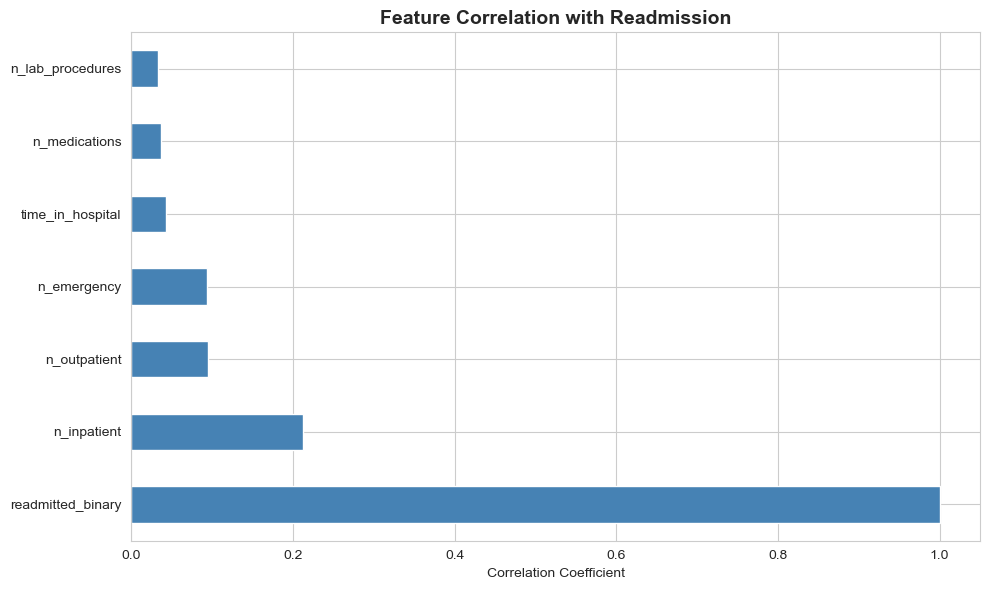

In [17]:
# Visualize correlation
fig, ax = plt.subplots(figsize=(10, 6))
correlation[:-1].plot(kind='barh', ax=ax, color='steelblue')
ax.set_title('Feature Correlation with Readmission', fontsize=14, fontweight='bold')
ax.set_xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

In [18]:
# 14. TIME IN HOSPITAL ANALYSIS
print("\n14. TIME IN HOSPITAL ANALYSIS")
print(df['time_in_hospital'].describe())
print(f"Max time in hospital: {df['time_in_hospital'].max()} days")
print(f"Min time in hospital: {df['time_in_hospital'].min()} days")


14. TIME IN HOSPITAL ANALYSIS
count    25000.00000
mean         4.45332
std          3.00147
min          1.00000
25%          2.00000
50%          4.00000
75%          6.00000
max         14.00000
Name: time_in_hospital, dtype: float64
Max time in hospital: 14 days
Min time in hospital: 1 days


In [19]:
# 15. READMISSION BY KEY FEATURES
print("\n15. READMISSION RATE BY KEY FEATURES")
print("\nReadmission rate by age group:")
print(pd.crosstab(df['age'], df['readmitted'], margins=True, normalize='index'))


15. READMISSION RATE BY KEY FEATURES

Readmission rate by age group:
readmitted        no       yes
age                           
[40-50)     0.554897  0.445103
[50-60)     0.558401  0.441599
[60-70)     0.531541  0.468459
[70-80)     0.512067  0.487933
[80-90)     0.504207  0.495793
[90-100)    0.578667  0.421333
All         0.529840  0.470160


In [20]:
print("\nReadmission rate by time in hospital (binned):")
df['time_bins'] = pd.cut(df['time_in_hospital'], bins=[0, 3, 7, 14, 100])
print(pd.crosstab(df['time_bins'], df['readmitted'], margins=True, normalize='index'))


Readmission rate by time in hospital (binned):
readmitted        no       yes
time_bins                     
(0, 3]      0.556678  0.443322
(3, 7]      0.506990  0.493010
(7, 14]     0.503375  0.496625
All         0.529840  0.470160
